In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import import_ipynb
import copy
import data_preperation as dp
import internal_inconsistencies as ii
import external_inconsistencies as ei


importing Jupyter notebook from data_preperation.ipynb
importing Jupyter notebook from internal_inconsistencies.ipynb
importing Jupyter notebook from external_inconsistencies.ipynb


In [2]:
countries={ 'Austria': 'AT', 'Belgium': 'BE',  'Bulgaria': 'BG', 'Switzerland': 'CH', 'Czech Republic': 'CZ', 'Germany': 'DE', 'Denmark': 'DK', 'Estonia': 'EE', 'Spain': 'ES', 'Finland': 'FI', 'France': 'FR',  'Greece': 'GR', 'Hungary': 'HU', 'Ireland': 'IE', 'Italy': 'IT', 'Lithuania': 'LT', 'Latvia': 'LV', 'Montenegro': 'ME','Netherlands': 'NL', 'Norway': 'NO', 'Poland': 'PL', 'Portugal': 'PT', 'Serbia': 'RS', 'Sweden': 'SE', 'Slovenia': 'SI', 'Slovakia': 'SK', 'United Kingdom': 'GB'}
abbr_list=list(countries.values())

# 1. Data mismatches in ENTSO-E data

## 1.1 Calculating missing values in data files

,Country,demand,Biomass,Fossil Brown coal/Lignite,Fossil Coal-derived gas,Fossil Gas,Fossil Hard coal,Fossil Oil,Fossil Oil shale,Fossil Peat,...,Hydro Water Reservoir,Marine,Nuclear,Other,Other renewable,Solar,Waste,Wind Offshore,Wind Onshore,Total missing generation data
0,AT,0,0,n/e,n/e,0,0,n/e,n/e,n/e,...,0,n/e,n/e,0,n/e,0,0,n/e,0,0.0
1,BE,0,0,n/e,n/e,0,n/e,0,n/e,n/e,...,n/e,n/e,0,0,n/e,0,0,836,0,4993.0
2,BG,25,0,0,n/e,0,0,n/e,n/e,n/e,...,0,n/e,0,n/e,n/e,0,0,n/e,0,0.0
3,CH,0,n/e,n/e,n/e,n/e,n/e,n/e,n/e,n/e,...,0,n/e,0,n/e,n/e,0,n/e,n/e,0,0.0
4,CZ,7,2,2,2,2,2,5,n/e,n/e,...,3,n/e,2,2,2,4,5,n/e,2,41.0
5,DE,0,0,0,34848,0,0,0,n/e,n/e,...,0,n/e,0,0,0,0,0,0,0,34848.0
6,DK,0,0,n/e,n/e,0,0,0,n/e,n/e,...,n/e,n/e,n/e,n/e,n/e,0,0,0,0,0.0
7,EE,144,206,n/e,206,206,n/e,n/e,206,206,...,n/e,n/e,n/e,206,206,206,206,n/e,206,2266.0
8,ES,2,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,8779.0
9,FI,3,2,n/e,n/e,3,3,3,n/e,2,...,n/e,n/e,2,2,3,n/e,3,n/e,2,28.0


,Link,No of missing data
0,AT - > CH,0
1,CH - > AT,0
2,AT - > CZ,0
3,CZ - > AT,0
4,AT - > DE,0
...,...,...
141,MK - > RS,0
142,RS - > RO,0
143,RO - > RS,0
144,SK - > UA,9


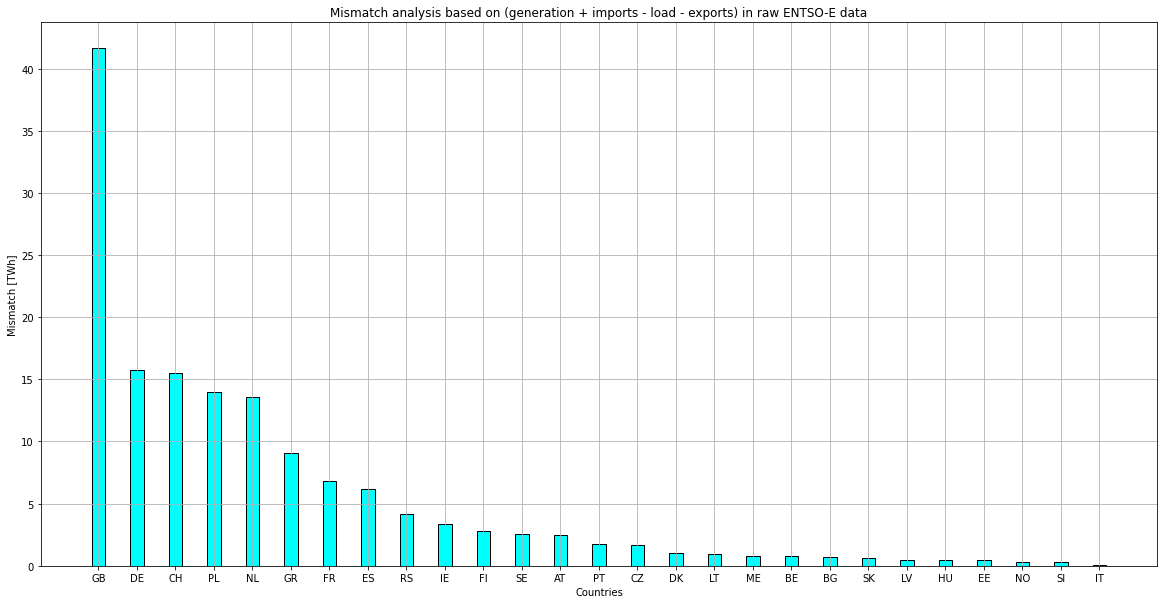

In [3]:
generation_load_missing_data, transmission_missing_data, mismatch_data = ii.mismatch_raw_data(countries)

# 2. ENTSO-E data representation

## 2.1 Get all the hourly load data of each country to a single dataframe

In [3]:
load_dic=dp.load(countries)
# display(load_data)

'Austria - load: 0 missing data filled'

'Belgium - load: 0 missing data filled'

'Bulgaria - load: 25 missing data filled'

'Switzerland - load: 0 missing data filled'

'Czech Republic - load: 7 missing data filled'

'Germany - load: 0 missing data filled'

'Denmark - load: 0 missing data filled'

'Estonia - load: 144 missing data filled'

'Spain - load: 2 missing data filled'

'Finland - load: 3 missing data filled'

'France - load: 18 missing data filled'

'Greece - load: 2 missing data filled'

'Hungary - load: 0 missing data filled'

'Ireland - load: 18 missing data filled'

'Italy - load: 0 missing data filled'

'Lithuania - load: 67 missing data filled'

'Latvia - load: 6 missing data filled'

'Montenegro - load: 0 missing data filled'

'Netherlands - load: 0 missing data filled'

'Norway - load: 0 missing data filled'

'Poland - load: 1 missing data filled'

'Portugal - load: 0 missing data filled'

'Serbia - load: 1 missing data filled'

'Sweden - load: 0 missing data filled'

'Slovenia - load: 0 missing data filled'

'Slovakia - load: 0 missing data filled'

'United Kingdom - load: 8 missing data filled'

## 2.2 Get all the hourly generation data of each country from each source to a single dataframe

In [4]:
generation_dic=dp.generation(countries)
# display(generation_data)

'Austria - Generation: 0 missing data filled'

'Belgium - Generation: 4993 missing data filled'

'Bulgaria - Generation: 0 missing data filled'

'Switzerland - Generation: 0 missing data filled'

'Czech Republic - Generation: 41 missing data filled'

'Germany - Generation: 34848 missing data filled'

'Denmark - Generation: 0 missing data filled'

'Estonia - Generation: 2266 missing data filled'

'Spain - Generation: 8779 missing data filled'

'Finland - Generation: 28 missing data filled'

'France - Generation: 4724 missing data filled'

'Greece - Generation: 8773 missing data filled'

'Hungary - Generation: 12123 missing data filled'

'Ireland - Generation: 374 missing data filled'

'Italy - Generation: 286 missing data filled'

'Lithuania - Generation: 264 missing data filled'

'Latvia - Generation: 50 missing data filled'

'Montenegro - Generation: 7246 missing data filled'

'Netherlands - Generation: 8635 missing data filled'

'Norway - Generation: 9 missing data filled'

'Poland - Generation: 0 missing data filled'

'Portugal - Generation: 0 missing data filled'

'Serbia - Generation: 183 missing data filled'

'Sweden - Generation: 1 missing data filled'

'Slovenia - Generation: 10 missing data filled'

'Slovakia - Generation: 5259 missing data filled'

'United Kingdom - Generation: 509 missing data filled'

## 2.3 Get all the hourly cross-border transmission data of each country to a single dataframe

In [5]:
transmission_data = dp.cross_border()
# display(transmission_data)
# 'cross_border_data' shows the net import/net export of the whole country in hourly timesteps
# display(crossborder_data)


'AT - > CH - transmission: 0 missing data filled'

'AT - > CZ - transmission: 0 missing data filled'

'AT - > DE - transmission: 0 missing data filled'

'AT - > HU - transmission: 0 missing data filled'

'AT - > IT - transmission: 0 missing data filled'

'AT - > SI - transmission: 0 missing data filled'

'BE - > FR - transmission: 0 missing data filled'

'BE - > LU - transmission: 0 missing data filled'

'BE - > NL - transmission: 0 missing data filled'

'BG - > GR - transmission: 0 missing data filled'

'BG - > MK - transmission: 864 missing data filled'

'BG - > RO - transmission: 4 missing data filled'

'BG - > RS - transmission: 0 missing data filled'

'BG - > TR - transmission: 864 missing data filled'

'CH - > DE - transmission: 0 missing data filled'

'CH - > FR - transmission: 0 missing data filled'

'CH - > IT - transmission: 0 missing data filled'

'CZ - > DE - transmission: 0 missing data filled'

'CZ - > PL - transmission: 0 missing data filled'

'CZ - > SK - transmission: 0 missing data filled'

'DE - > DK - transmission: 0 missing data filled'

'DE - > FR - transmission: 2 missing data filled'

'DE - > LU - transmission: 0 missing data filled'

'DE - > NL - transmission: 34 missing data filled'

'DE - > PL - transmission: 0 missing data filled'

'DE - > SE - transmission: 0 missing data filled'

'DK - > NO - transmission: 0 missing data filled'

'DK - > SE - transmission: 0 missing data filled'

'EE - > FI - transmission: 421 missing data filled'

'EE - > LV - transmission: 3602 missing data filled'

'EE - > RU - transmission: 414 missing data filled'

'ES - > FR - transmission: 0 missing data filled'

'ES - > PT - transmission: 0 missing data filled'

'FI - > NO - transmission: 0 missing data filled'

'FI - > RU - transmission: 8 missing data filled'

'FI - > SE - transmission: 0 missing data filled'

'FR - > IT - transmission: 0 missing data filled'

'FR - > UK - transmission: 60 missing data filled'

'GR - > AL - transmission: 0 missing data filled'

'GR - > IT - transmission: 0 missing data filled'

'GR - > MK - transmission: 0 missing data filled'

'HR - > BA - transmission: 0 missing data filled'

'HR - > HU - transmission: 0 missing data filled'

'HR - > RS - transmission: 0 missing data filled'

'HR - > SI - transmission: 0 missing data filled'

'HU - > RO - transmission: 0 missing data filled'

'HU - > RS - transmission: 0 missing data filled'

'HU - > SK - transmission: 0 missing data filled'

'HU - > UA - transmission: 14 missing data filled'

'IE - > UK - transmission: 0 missing data filled'

'IT - > MT - transmission: 18 missing data filled'

'IT - > SI - transmission: 46 missing data filled'

'LT - > BY - transmission: 58 missing data filled'

'LT - > LV - transmission: 76 missing data filled'

'LT - > PL - transmission: 0 missing data filled'

'LT - > RU - transmission: 58 missing data filled'

'LT - > SE - transmission: 0 missing data filled'

'LV - > RU - transmission: 18 missing data filled'

'ME - > AL - transmission: 0 missing data filled'

'ME - > BA - transmission: 0 missing data filled'

'ME - > RS - transmission: 0 missing data filled'

'NL - > NO - transmission: 0 missing data filled'

'NL - > UK - transmission: 0 missing data filled'

'NO - > SE - transmission: 0 missing data filled'

'PL - > SE - transmission: 0 missing data filled'

'PL - > SK - transmission: 0 missing data filled'

'PL - > UA - transmission: 0 missing data filled'

'RS - > AL - transmission: 0 missing data filled'

'RS - > BA - transmission: 0 missing data filled'

'RS - > HR - transmission: 0 missing data filled'

'RS - > MK - transmission: 0 missing data filled'

'RS - > RO - transmission: 0 missing data filled'

'SK - > UA - transmission: 17 missing data filled'

# 3. Identifying inconsistencies in ENTSO-E Generation data

In [ ]:
inconsistency_in_generation = ii.inconcistencies_generation_data()


# 4. Consolidation based on internal data

## 3.1 Obtaining consolidated ENTSO-E data using Nearest Neighbours Mean Approach

### !!! This step takes about 14 minutes to complete in an Intel I5 processor with 8 GB Ram

In [ ]:
# ii.consolidation(countries, 'Nearest Neighbours Mean')


## 3.2 Obtaining consolidated data using Polynomial Linear Regression

### !!! This step takes about 40 minutes to complete in an Intel I5 processor with 8 GB Ram

In [ ]:
# ii.consolidation(countries, 'Polynomial Linear Regression')


## 4.3 Obtaining consolidated ENTSO-E data using Internal Sigma Approach

### !!! This step takes about 2 hours to complete in an Intel I5 processor with 8 GB Ram

In [3]:
load_dic = {}
generation_dic = {}
transmission_data = pd.DataFrame()

for abbr in abbr_list:
    load_dic[abbr] = pd.read_csv(f'../Data Sources/output/Polynomial Linear Regression/Load/{abbr}.csv').iloc[:,1:]
    generation_dic[abbr] = pd.read_csv(f'../Data Sources/output/Polynomial Linear Regression/Generation/{abbr}.csv').iloc[:,1:]
transmission_data = pd.read_csv(f'../Data Sources/output//Polynomial Linear Regression/Transmission/all_transmissions.csv').iloc[:, 1:]

In [4]:
load_dic_copy = copy.deepcopy(load_dic) 
generation_dic_copy = copy.deepcopy(generation_dic)
transmission_data_copy = copy.deepcopy(transmission_data)
consolidated_gen_data, consolidated_load_data, consolidated_transmission_data = ii.sigma(load_dic_copy, generation_dic_copy, transmission_data_copy, countries)


SIGMA CALCULATED
VARIABLES DECLARED
Academic license - for non-commercial use only - expires 2021-09-28
Using license file C:\Users\lovin\gurobi.lic
OPTIMIZATION COMPLETED


<string>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


## 4.2 Mismatch analysis in the consolidated ENTSO-E data

### 4.2.1 Mismatch analysis in all 27 countries

In [ ]:
ii.mismatch_analysis(mismatch_data, abbr_list)


### 4.2.2 Mismatch analysis with only selected countries in optimization based internal consolidation method

In [ ]:
selected_countries = ['AT', 'CZ', 'DK', 'ES', 'FR','IE', 'NL', 'NO', 'PT', 'SI', 'SE', 'CH', 'UK']
ii.mismatch_analysis(mismatch_data, selected_countries)


# 5. Comparission of ENTSO-E data with other sources

## 5.1 Comparing ENTSO-E & Eurostat data

### 5.1.1 Comparing annual generation data of ENTSO-E & Eurostat data

In [ ]:
# ei.eurostat_comparission_gen_data(generation_data,countries)

### 5.1.2 Comparing annual load data of ENTSO-E & Eurostat data

In [ ]:
# ei.eurostat_comparission_load_data(load_data, countries)


### 5.1.3 Comparing annual import/export data of ENTSO-E & Eurostat data

In [ ]:
# ei.eurostat_comparission_transmission_data(import_export_using_crossborder_data, countries)